## Python statistics essential training - 03_04_twovariables


Standard imports


In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv("./gapminder.csv")

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
italy = gapminder.query('country == "Italy"')

In [7]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


<Axes: xlabel='year', ylabel='population'>

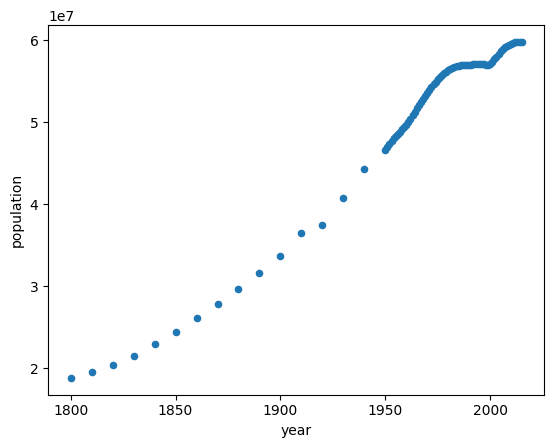

In [8]:
italy.plot.scatter("year", "population")

In [12]:
def select_country(country):
    country_data = gapminder.query(f'country == "{country}"')
    country_data.plot.scatter("year", "population")
    pp.title(f"{country} Population")

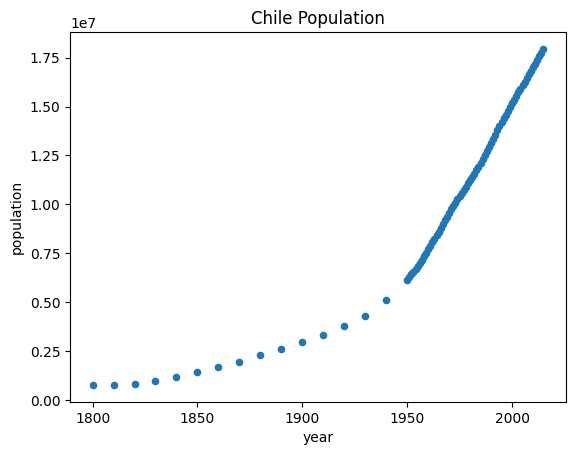

In [13]:
select_country("Chile")

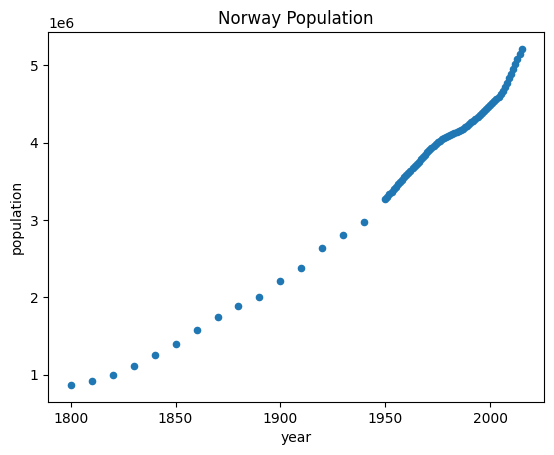

In [14]:
select_country("Norway")

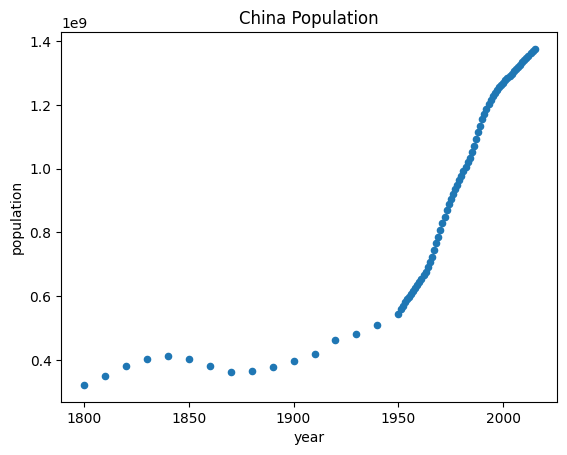

In [15]:
select_country("China")

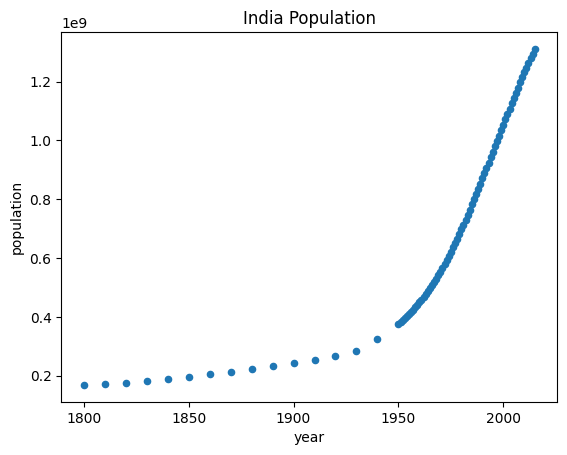

In [16]:
select_country("India")

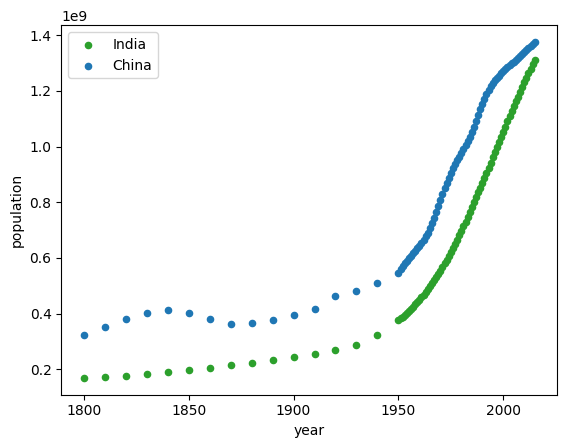

In [21]:
india_pop = gapminder.query('country == "India"')
china_pop = gapminder.query('country == "China"')
ax = india_pop.plot.scatter("year", "population", label="India", color="C2")
china_pop.plot.scatter("year", "population", label="China", ax=ax)
pp.legend()

<Axes: xlabel='year', ylabel='gdp_per_day'>

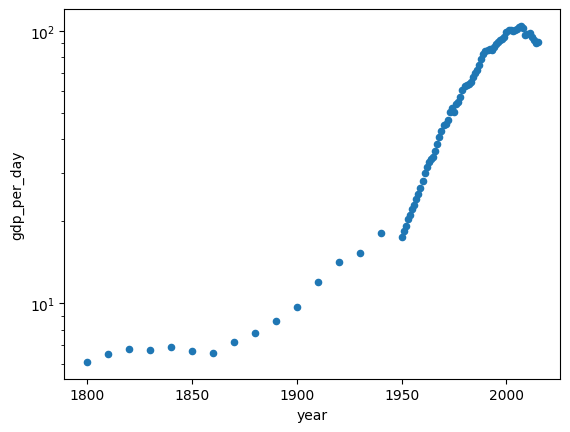

In [23]:
italy.plot.scatter("year", "gdp_per_day", logy=True)

<Axes: xlabel='gdp_per_day', ylabel='life_expectancy'>

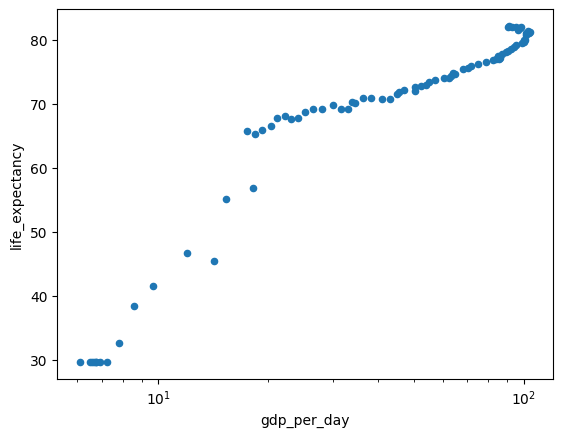

In [24]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True)

<Axes: xlabel='gdp_per_day', ylabel='life_expectancy'>

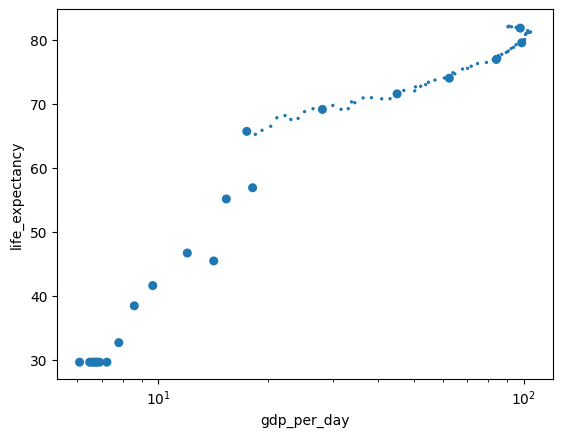

In [25]:
size = np.where(italy.year % 10 == 0, 30, 2)
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

<Axes: xlabel='gdp_per_day', ylabel='life_expectancy'>

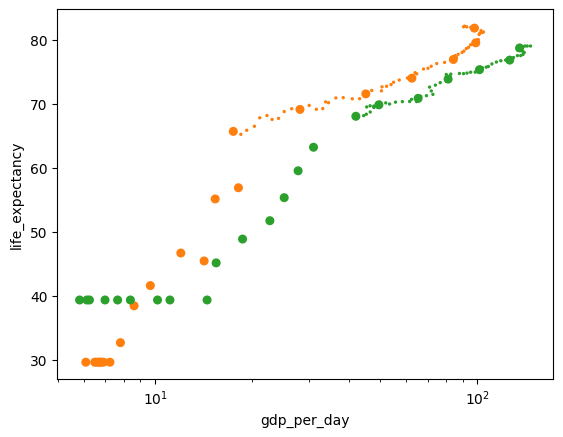

In [31]:
data = gapminder.query('(country == "Italy") or (country == "United States")')
size = np.where(data.year % 10 == 0, 30, 2)
color = np.where(data.country == "Italy", "C1", "C2")

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, color=color)
# pp.title("")

<Axes: xlabel='gdp_per_day', ylabel='life_expectancy'>

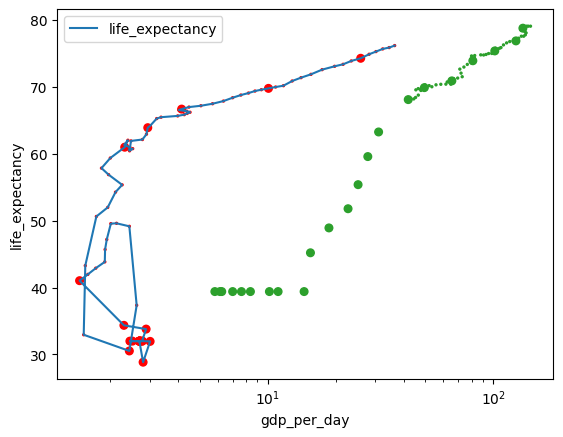

In [33]:
data = gapminder.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 == 0, 30, 2)
color = np.where(data.country == "China", "Red", "C2")

ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, color=color)
# pp.title("")
data[data.country == "China"].plot.line(x="gdp_per_day", y="life_expectancy", ax=ax)